In [1]:
#Sebastian Russo 79117092
#Bachelor Thesis
#Application of Machine Learning Techniques for the Early Detection of Diabetes: 
#A Comparative Study of Classification Models

#Library to manipulate and analyze datasets 
import pandas as pd

#Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For path finding
from pathlib import Path

In [2]:
#Construct path using pathlib
data_path = Path("dataset") / "diabetes_binary_health_indicators_BRFSS2015.csv"
dataset_df = pd.read_csv(data_path)

In [ ]:
#Analyze dataset
dataset_head = dataset_df.head().to_string()
dataset_tails = dataset_df.tail().to_string()
dataset_shape = dataset_df.shape
rows, cols = dataset_shape 

#Inspect and log head, tail, dimensions and shape
print(f"Dataset head:\n{dataset_head}")
print(f"Dataset shape: {dataset_shape}")
print(f"Dataset has {cols} columns and {rows} rows")

Dataset head:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0           0.0     0.0      1.0                0.0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0     3.0
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0                   0.0           1.0     0.0      0.0                0.0            0.0          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0     1.0
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0                   0.0           0.0     1.0      0.0                0.0            1.0          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0     8.0
3              0.0     1.0    

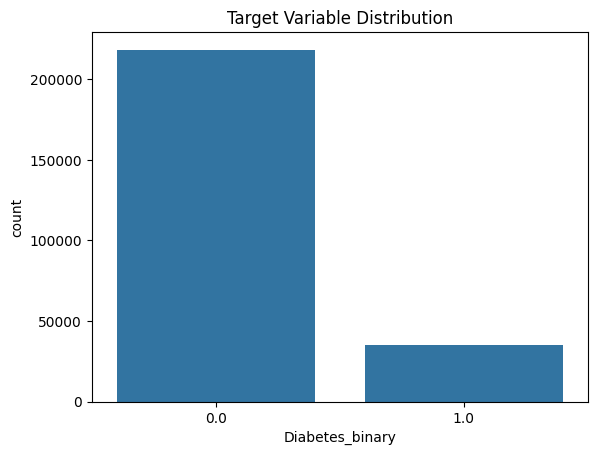

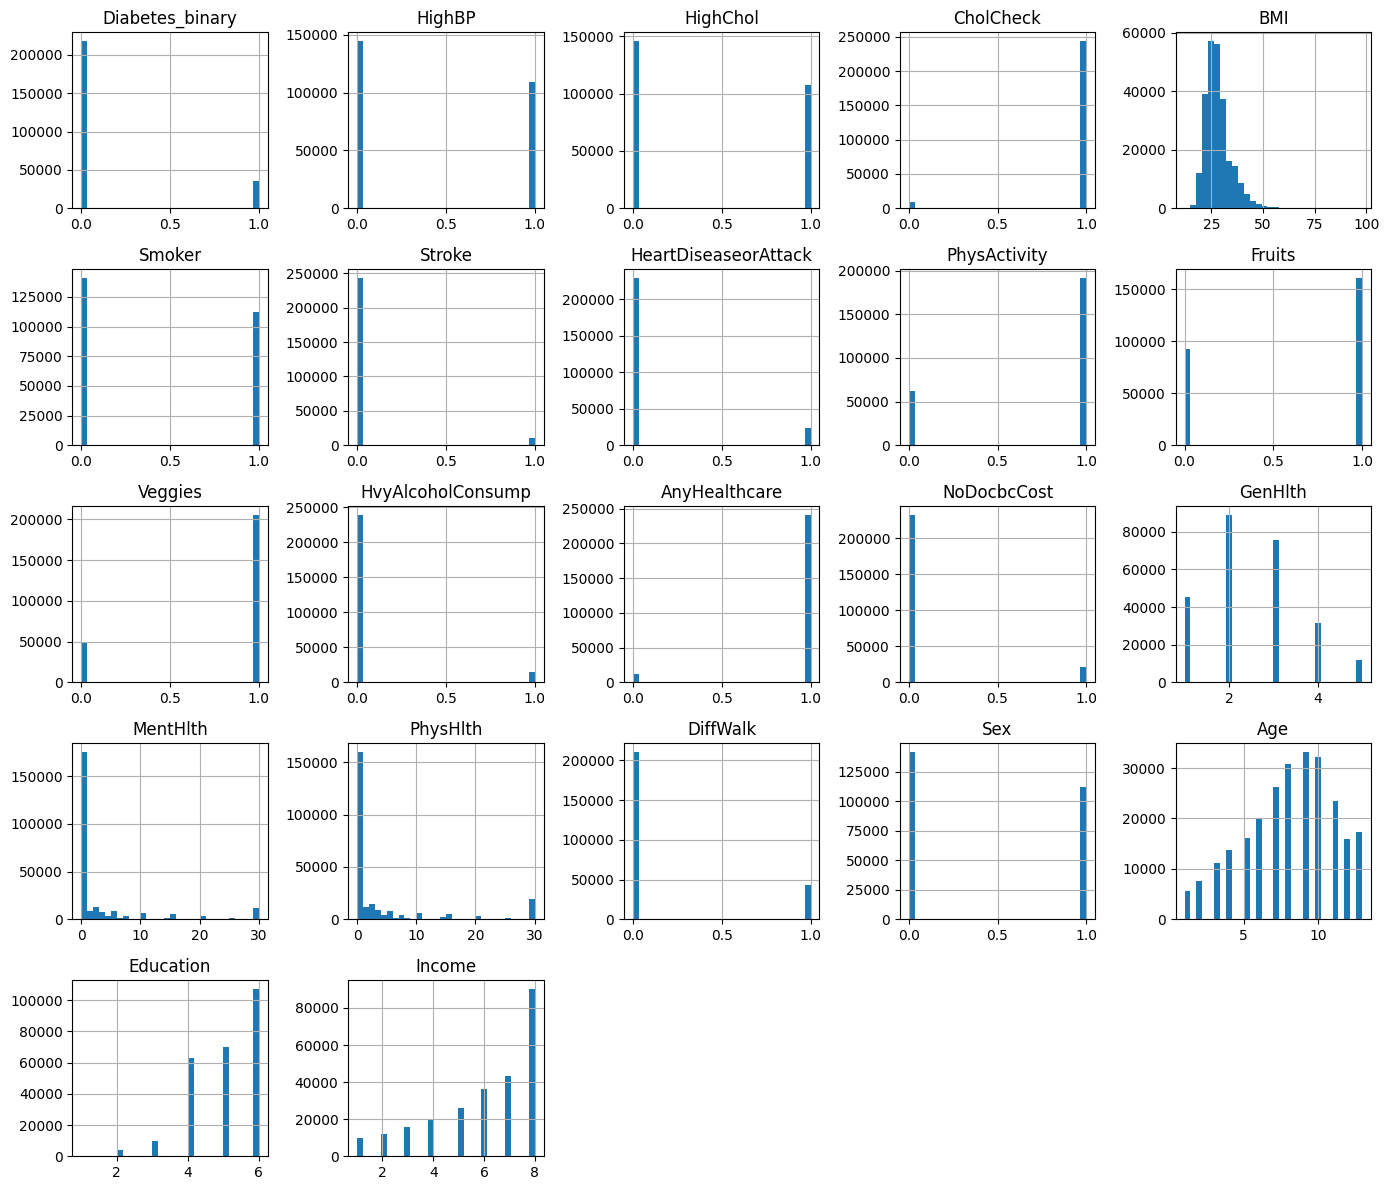

In [4]:
#Distribution of dependent variable
sns.countplot(x='Diabetes_binary', data=dataset_df)
plt.title("Target Variable Distribution")
plt.show()

#Histograms to check for outliers
dataset_df.hist(figsize=(14, 12), bins=30)
plt.tight_layout()
plt.show()



In [5]:

#Summary statistics of numeric columns
print("Summary statistics:\n", dataset_df.describe())

#Check for missing data
missing_values = dataset_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")


Summary statistics:
        Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000

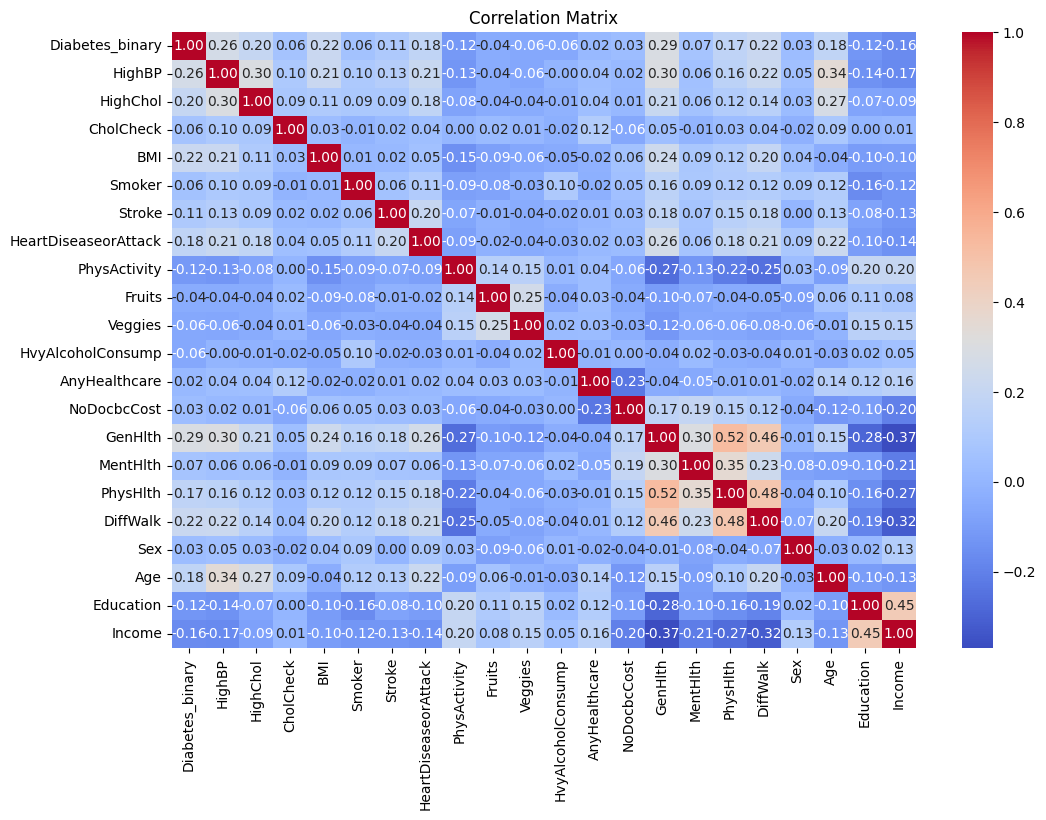

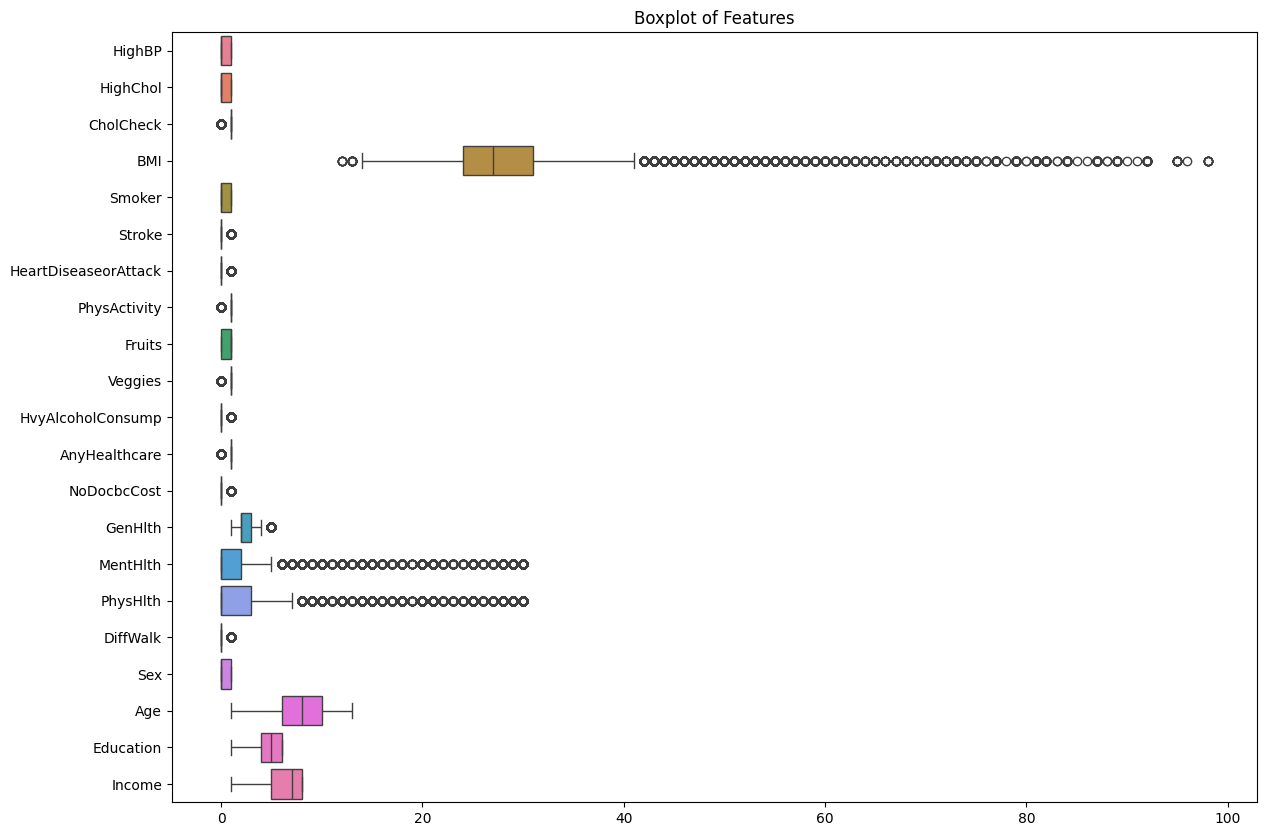

In [6]:
#Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation = dataset_df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#Boxplots for outlier detection (excluding target column)
plt.figure(figsize=(14, 10))
sns.boxplot(data=dataset_df.drop(columns=['Diabetes_binary']), orient='h')
plt.title("Boxplot of Features")
plt.show()


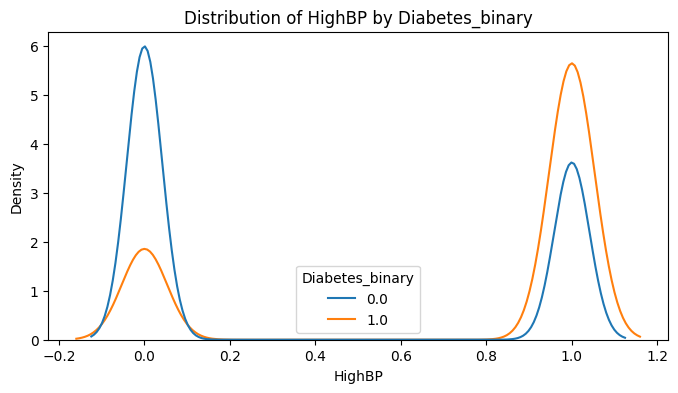

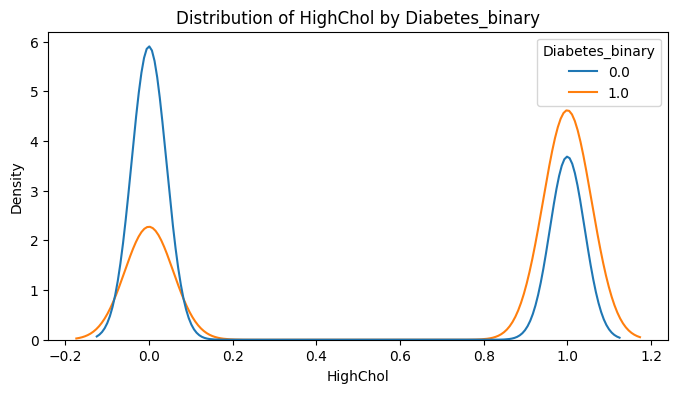

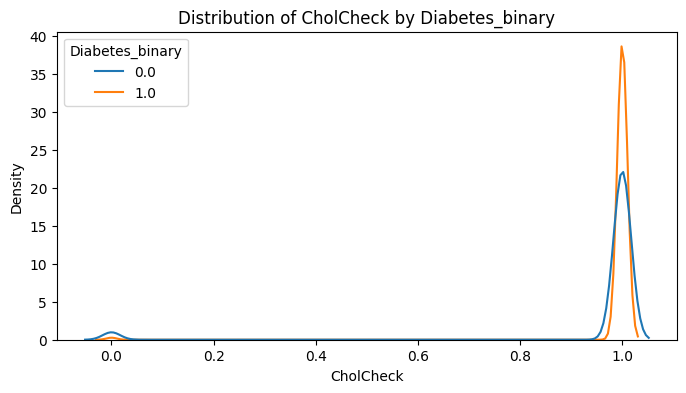

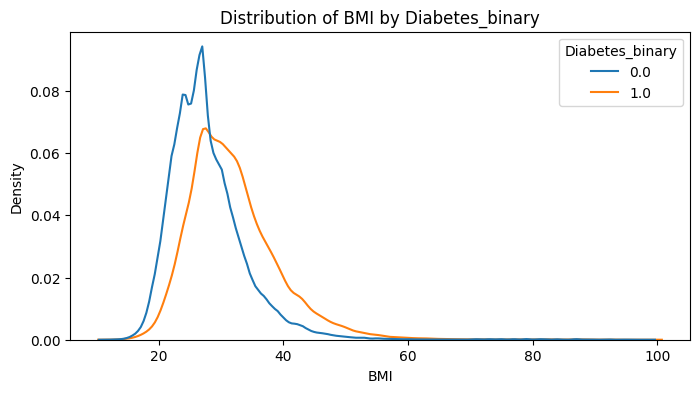

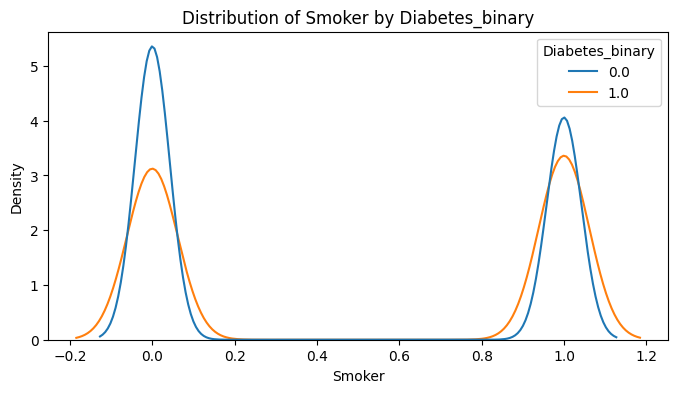

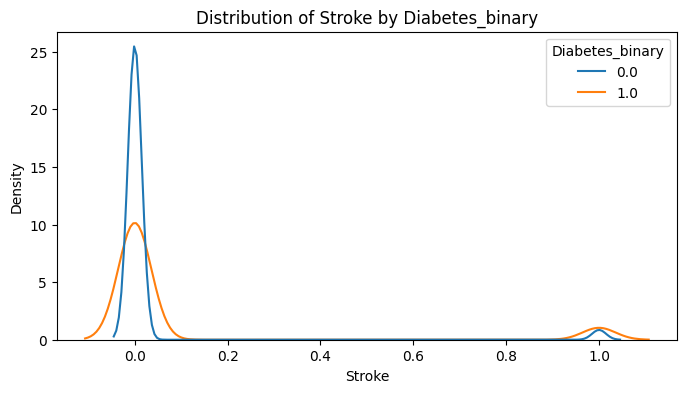

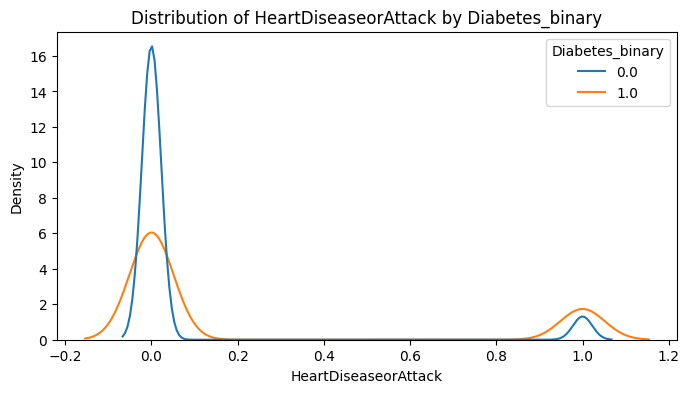

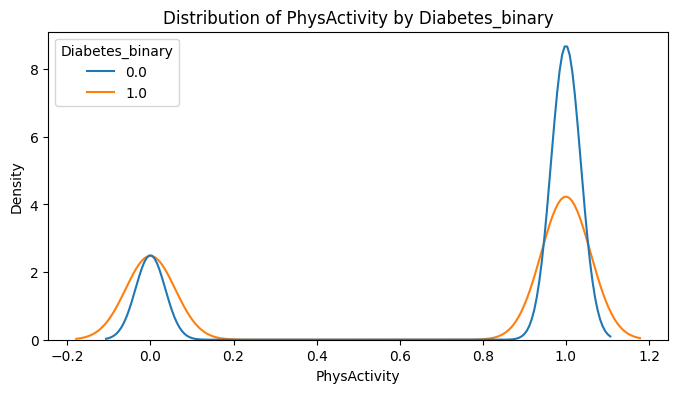

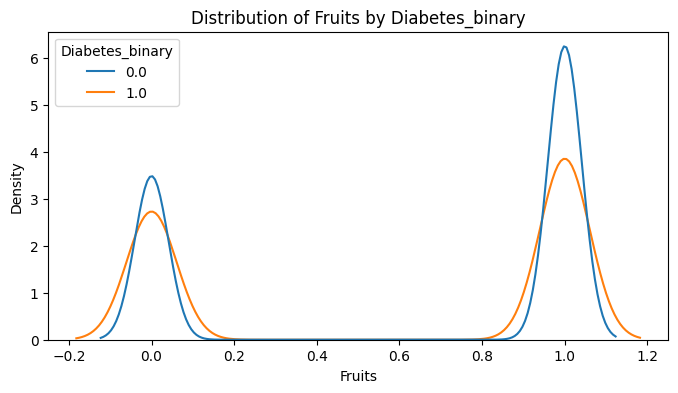

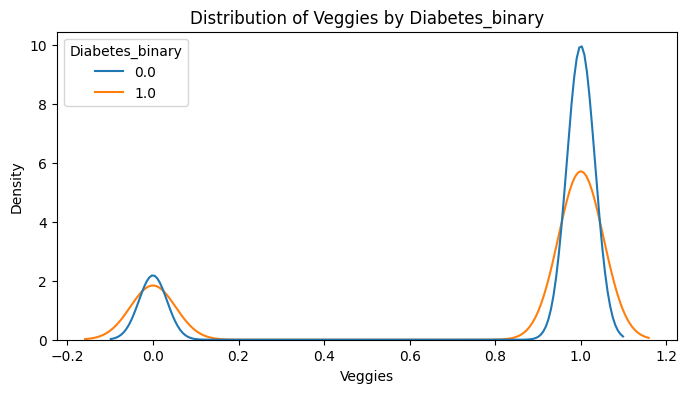

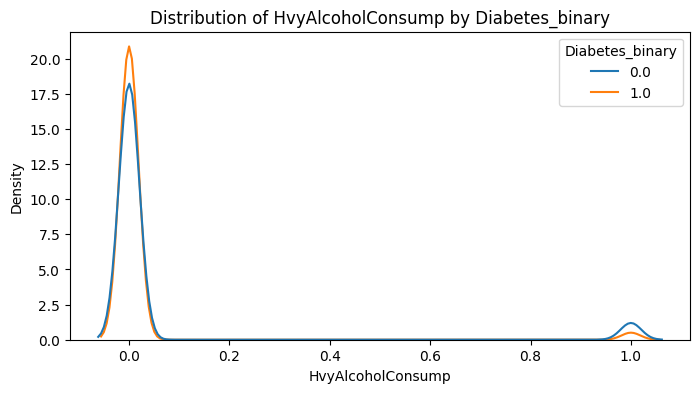

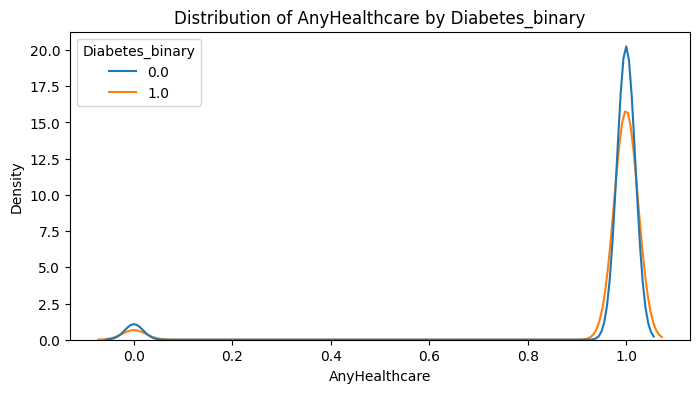

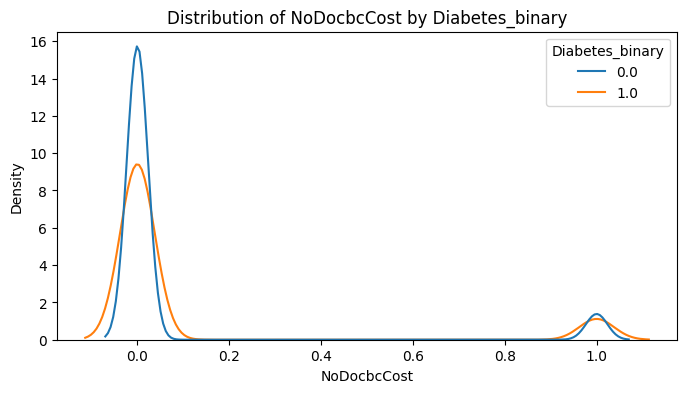

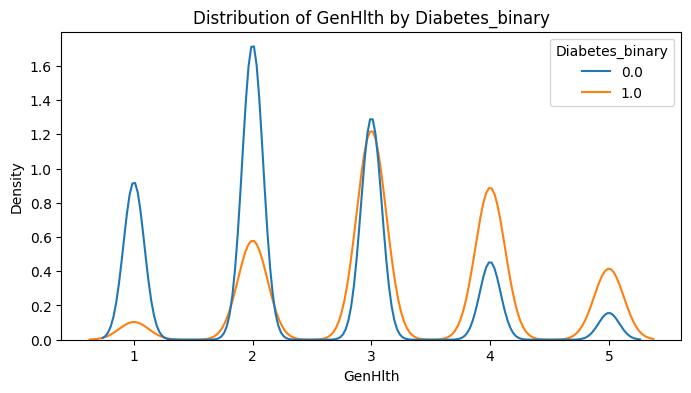

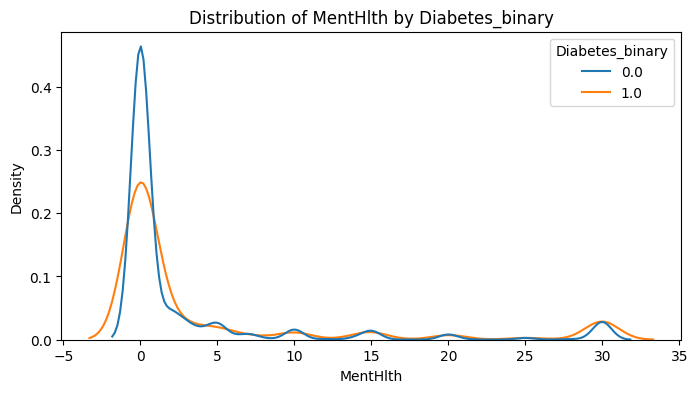

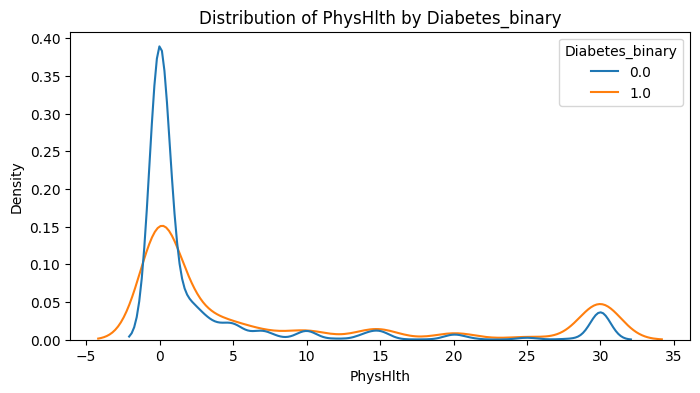

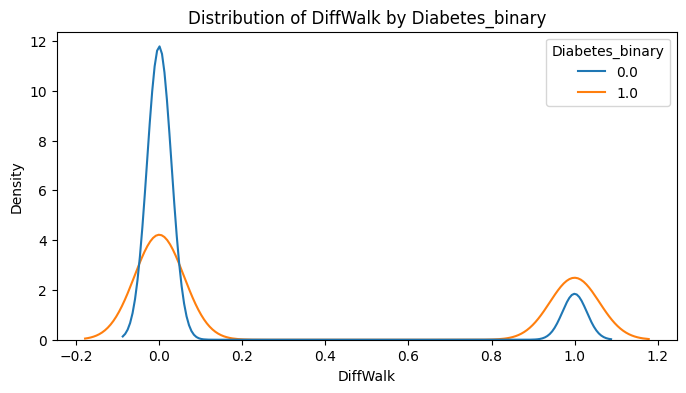

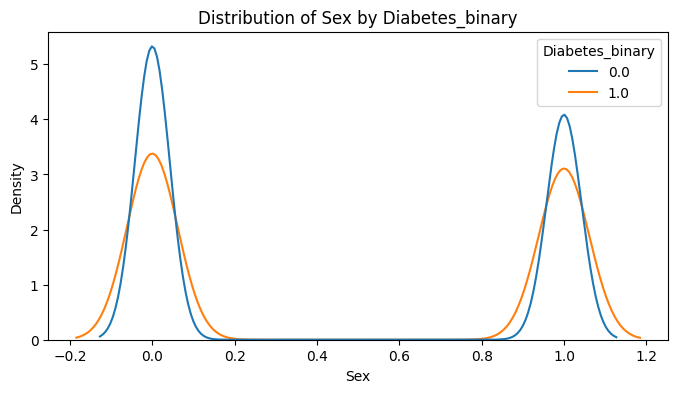

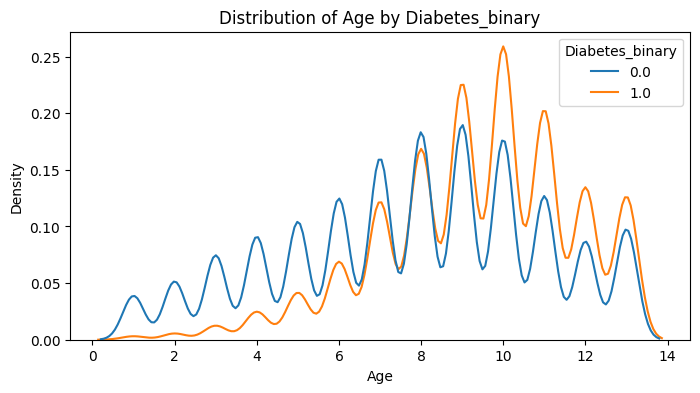

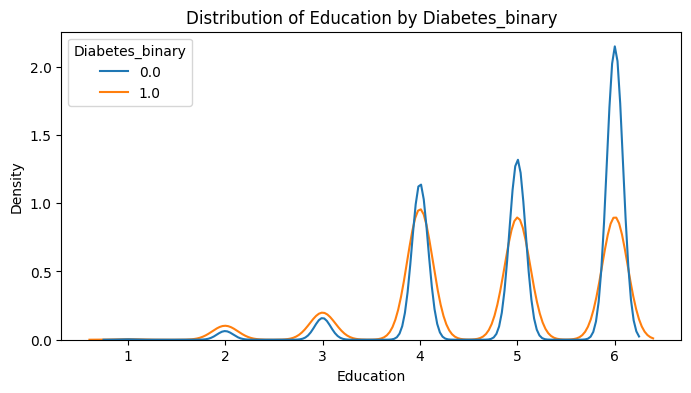

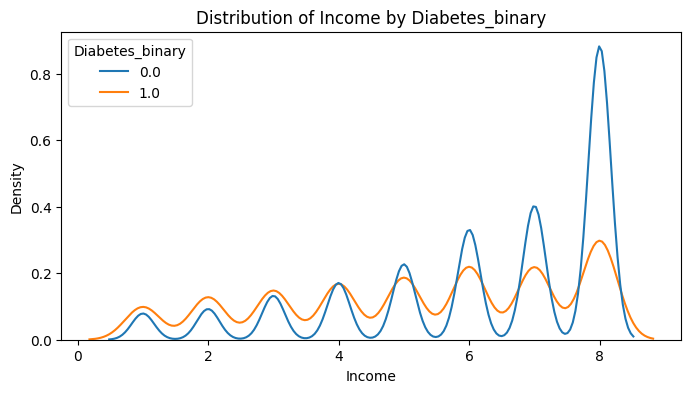

In [7]:
#Feature distributions split by target variable (KDE plots)
for col in dataset_df.columns[1:]:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=dataset_df, x=col, hue='Diabetes_binary', common_norm=False)
    plt.title(f"Distribution of {col} by Diabetes_binary")
    plt.show()